# **DDoS Attack Detection and Analysis**

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras import models, layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [3]:
### UPLOAD FILES ###
from google.colab import files
uploaded = files.upload()

Saving CORRECT_ID.txt to CORRECT_ID.txt
Saving WRONG_ID.txt to WRONG_ID.txt


**Loading Data**

In [4]:
CORRECT_ID = pd.read_csv('CORRECT_ID.txt', sep='\t')
WRONG_ID = pd.read_csv('WRONG_ID.txt', sep='\t')

**Counting Labels**

In [5]:
label_counts = CORRECT_ID['label'].value_counts()

print(f"Number of rows with label 0: {label_counts.get(0.0, 0)}")
print(f"Number of rows with label 1: {label_counts.get(1.0, 0)}")

Number of rows with label 0: 10895
Number of rows with label 1: 11271


**Balancing the Dataset**

In [6]:
# Function to balance the samples in our DataFrame
def balance_classes(df, target_col, n_per_class):

    class_0 = df[df[target_col] == 0]
    class_1 = df[df[target_col] == 1]

    class_0_sampled = class_0.sample(n=n_per_class, random_state=42)
    class_1_sampled = class_1.sample(n=n_per_class, random_state=42)

    balanced_df = pd.concat([class_0_sampled, class_1_sampled]).sample(frac=1, random_state=42)
    balanced_df = balanced_df.reset_index(drop=True)

    return balanced_df

CORRECT_ID = balance_classes(CORRECT_ID, target_col='label', n_per_class=5000)
WRONG_ID = balance_classes(WRONG_ID, target_col='label', n_per_class=5000)

print("Number of samples in CORRECT_ID:", CORRECT_ID['label'].value_counts())
print("Number of samples in WRONG_ID:", WRONG_ID['label'].value_counts())

CORRECT_ID.to_csv('CORRECT_ID_balanced.txt', sep='\t', index=False)
WRONG_ID.to_csv('WRONG_ID_balanced.txt', sep='\t', index=False)

Number of samples in CORRECT_ID: label
1    5000
0    5000
Name: count, dtype: int64
Number of samples in WRONG_ID: label
1    5000
0    5000
Name: count, dtype: int64


In [7]:
# Styling the DataFrame for display
styled_df = WRONG_ID.head(10).style.format(precision=2).set_properties(**{'text-align': 'center'})
styled_df

,task-clock,context-switches,cpu-migrations,page-faults,cycles,instructions,branches,branch-misses,label
0,26.82,56.00,2.00,0.00,52432185.00,78943519.00,14239311.00,59455.00,1
1,11.91,4.00,0.00,0.00,26926419.00,43537471.00,7974447.00,513.00,0
2,17.03,3.00,0.00,0.00,34302466.00,55452955.00,10156206.00,2762.00,0
3,19.31,45.00,2.00,0.00,31134974.00,60271924.00,10954183.00,13654.00,0
4,91.88,13.00,1.00,0.00,182459003.00,292534048.00,53576620.00,27642.00,0
5,4.06,34.00,2.00,2.00,7913039.00,11498664.00,2117652.00,5000.00,1
6,26.74,4.00,0.00,0.00,53330876.00,86621204.00,15864154.00,5331.00,0
7,0.26,20.00,2.00,1.00,551433.00,248466.00,60670.00,3564.00,1
8,8.86,15.00,0.00,1.00,16406605.00,26157854.00,3940470.00,13243.00,1
9,41.45,4.00,0.00,0.00,82306345.00,132723214.00,24306054.00,6974.00,0


**Data Exploration**

In [8]:
# Checking for missing values
print(CORRECT_ID.isnull().sum())
print(WRONG_ID.isnull().sum())

# Checking data types
print(CORRECT_ID.dtypes)
print(WRONG_ID.dtypes)

print(CORRECT_ID.describe())
print(WRONG_ID.describe())

task-clock          0
context-switches    0
cpu-migrations      0
page-faults         0
cycles              0
instructions        0
branches            0
branch-misses       0
label               0
dtype: int64
task-clock          0
context-switches    0
cpu-migrations      0
page-faults         0
cycles              0
instructions        0
branches            0
branch-misses       0
label               0
dtype: int64
task-clock          float64
context-switches    float64
cpu-migrations      float64
page-faults         float64
cycles              float64
instructions        float64
branches            float64
branch-misses       float64
label                 int64
dtype: object
task-clock          float64
context-switches    float64
cpu-migrations      float64
page-faults         float64
cycles              float64
instructions        float64
branches            float64
branch-misses       float64
label                 int64
dtype: object
         task-clock  context-switches  cpu-mig

**SPLITTING DATA**

In [9]:
scenarios = ['CORRECT_ID', 'WRONG_ID']

for scenario in scenarios:
    X = globals()[scenario].drop(columns=["label"])
    y = globals()[scenario]["label"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )

    print(f"Scenario: {scenario}")
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print("-" * 40)

Scenario: CORRECT_ID
Training set size: 8000
Test set size: 2000
----------------------------------------
Scenario: WRONG_ID
Training set size: 8000
Test set size: 2000
----------------------------------------


# NEURAL NETWORK
**In this section, we construct a neural network for the CORRECT_ID scenario using fully connected layers, batch normalization, and dropout for regularization. The model is trained and evaluated, with key performance metrics and training progress visualized through loss and accuracy plots.**

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6964 - loss: 0.7370 - val_accuracy: 0.9400 - val_loss: 0.3611
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9052 - loss: 0.3386 - val_accuracy: 0.9465 - val_loss: 0.2486
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9306 - loss: 0.2804 - val_accuracy: 0.9500 - val_loss: 0.2217
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9324 - loss: 0.2564 - val_accuracy: 0.9520 - val_loss: 0.2035
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9406 - loss: 0.2472 - val_accuracy: 0.9545 - val_loss: 0.1939
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.2405 - val_accuracy: 0.9560 - val_loss: 0.1865
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9502 - loss: 0.2125 - val_accuracy: 0.9560 - val_loss: 0.1800
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.2117 - val_accuracy: 0.9580

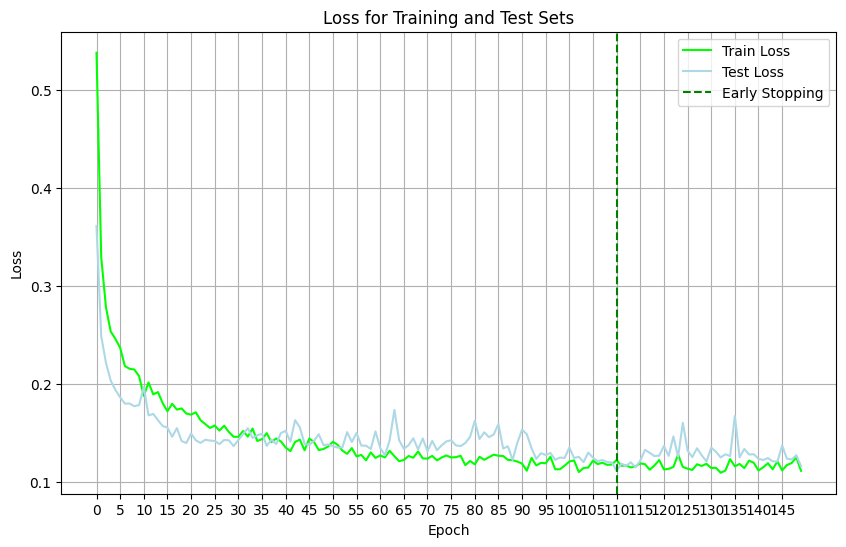

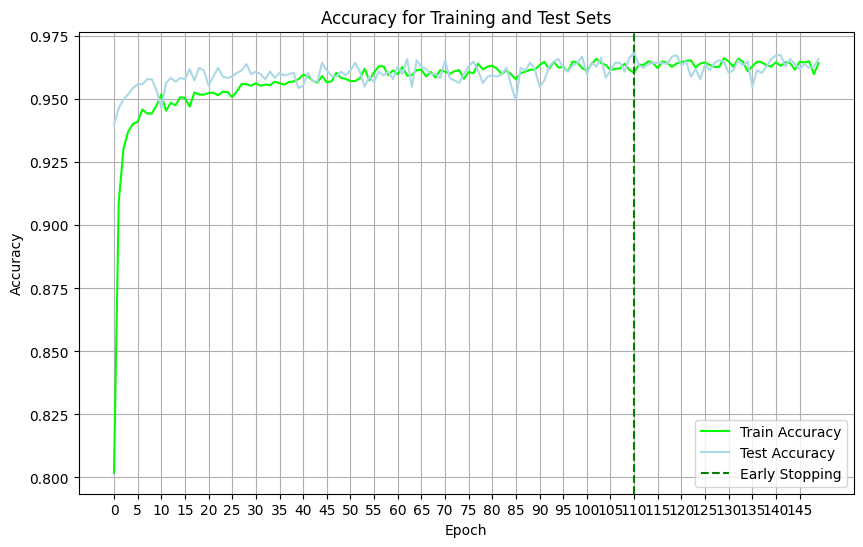


CORRECT_ID - Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 6,852 (26.77 KB)

In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Convert 'label' column to integer type
CORRECT_ID['label'] = CORRECT_ID['label'].astype('int')

# Splitting features and target
correct_id_X = CORRECT_ID.drop(columns=['label'])
correct_id_y = CORRECT_ID['label']

# Shuffling the dataset
CORRECT_ID = CORRECT_ID.sample(frac=1, random_state=42).reset_index(drop=True)

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 150

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(correct_id_X, correct_id_y, test_size=0.2, random_state=42)

# Scaling the features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
net_correct_id = models.Sequential()
net_correct_id.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
net_correct_id.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_correct_id.add(layers.BatchNormalization())
#net_correct_id.add(layers.Dropout(0.5))
net_correct_id.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_correct_id.add(layers.BatchNormalization())
net_correct_id.add(layers.Dropout(0.5))
net_correct_id.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_correct_id.add(layers.BatchNormalization())
net_correct_id.add(layers.Dropout(0.5))
net_correct_id.add(layers.Dense(1, activation='sigmoid'))

net_correct_id.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
start_training_time = time.time()
history = net_correct_id.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size,
                             validation_data=(X_test_scaled, y_test), verbose=1)
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Model evaluation
test_loss, test_accuracy = net_correct_id.evaluate(X_test_scaled, y_test, verbose=0)
print(f"CORRECT_ID Scenario - Best parameters: learning_rate={learning_rate}, batch_size={batch_size}, epochs={epochs}")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training time: {training_time:.2f} seconds")

# Prediction and results analysis
start_prediction_time = time.time()
y_pred_correct_id = net_correct_id.predict(X_test_scaled)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time
print(f"Prediction time: {prediction_time:.2f} seconds")

y_pred_classes_correct_id = (y_pred_correct_id > 0.5).astype("int32")

print("\nCORRECT_ID - Classification Report:")
print(classification_report(y_test, y_pred_classes_correct_id))

print("\nCORRECT_ID - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_correct_id))

# Find the best epoch with the lowest validation loss
best_val_loss_epoch = np.argmin(history.history['val_loss'])

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='lime')
plt.plot(history.history['val_loss'], label='Test Loss', color='lightblue')
plt.axvline(x=best_val_loss_epoch, color='green', linestyle='--', label='Early Stopping')
plt.xticks(np.arange(0, epochs, step=5))  # Display every 5th epoch on X-axis
plt.title('Loss for Training and Test Sets')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='lime')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='lightblue')
plt.axvline(x=best_val_loss_epoch, color='green', linestyle='--', label='Early Stopping')
plt.xticks(np.arange(0, epochs, step=5))  # Display every 5th epoch on X-axis
plt.title('Accuracy for Training and Test Sets')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model summary
print("\nCORRECT_ID - Model Summary:")
net_correct_id.summary()

**Building and Training the Neural Network for WRONG_ID Scenario**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8011 - loss: 0.5321 - val_accuracy: 0.9490 - val_loss: 0.2581
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9115 - loss: 0.3119 - val_accuracy: 0.9515 - val_loss: 0.2241
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9332 - loss: 0.2716 - val_accuracy: 0.9625 - val_loss: 0.1912
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9446 - loss: 0.2344 - val_accuracy: 0.9660 - val_loss: 0.1698
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9425 - loss: 0.2270 - val_accuracy: 0.9645 - val_loss: 0.1621
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9566 - loss: 0.1957 - val_accuracy: 0.9585 - val_loss: 0.1713
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9517 - loss: 0.2024 - val_accuracy: 0.9645 - val_loss: 0.1484
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9471 - loss: 0.2073 - val_accuracy: 0.9685

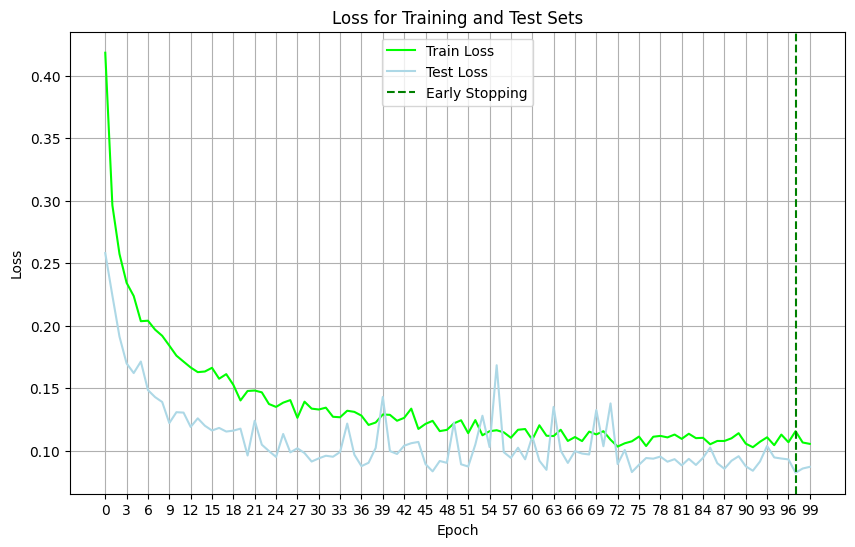

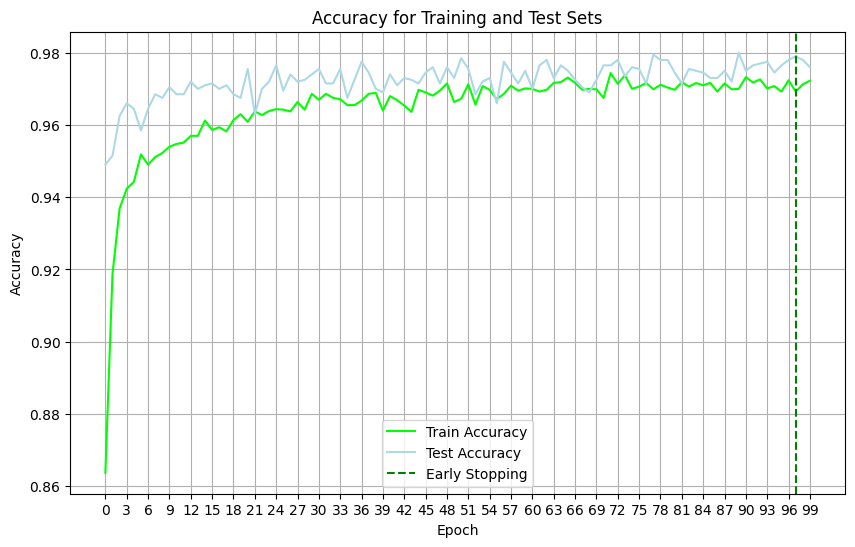


WRONG_ID - Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 6,852 (26.77 KB)

In [11]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Data preparation
wrong_id_X = WRONG_ID.drop(columns=['label'])
wrong_id_y = WRONG_ID['label']

# Hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 100

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(wrong_id_X, wrong_id_y, test_size=0.2, random_state=42)

# Scaling the features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the model
net_wrong_id = models.Sequential()
net_wrong_id.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
net_wrong_id.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_wrong_id.add(layers.BatchNormalization())
net_wrong_id.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_wrong_id.add(layers.BatchNormalization())
net_wrong_id.add(layers.Dropout(0.5))  # Reduced Dropout
net_wrong_id.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
net_wrong_id.add(layers.BatchNormalization())
net_wrong_id.add(layers.Dropout(0.5))
net_wrong_id.add(layers.Dense(1, activation='sigmoid'))

net_wrong_id.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
start_training_time = time.time()
history = net_wrong_id.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size,
                           validation_data=(X_test_scaled, y_test), verbose=1)
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Model evaluation
test_loss, test_accuracy = net_wrong_id.evaluate(X_test_scaled, y_test, verbose=0)
print(f"WRONG_ID Scenario - Best parameters: learning_rate={learning_rate}, batch_size={batch_size}, epochs={epochs}")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Training time: {training_time:.2f} seconds")

# Prediction and results analysis
start_prediction_time = time.time()
y_pred_wrong_id = net_wrong_id.predict(X_test_scaled)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time
print(f"Prediction time: {prediction_time:.2f} seconds")

y_pred_classes_wrong_id = (y_pred_wrong_id > 0.5).astype("int32")

print("\nWRONG_ID - Classification Report:")
print(classification_report(y_test, y_pred_classes_wrong_id))

print("\nWRONG_ID - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes_wrong_id))

# Find the best epoch with the lowest validation loss
best_val_loss_epoch = np.argmin(history.history['val_loss'])

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='lime')
plt.plot(history.history['val_loss'], label='Test Loss', color='lightblue')
plt.axvline(x=best_val_loss_epoch, color='green', linestyle='--', label='Early Stopping')
plt.xticks(np.arange(0, epochs, step=3))
plt.title('Loss for Training and Test Sets')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='lime')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='lightblue')
plt.axvline(x=best_val_loss_epoch, color='green', linestyle='--', label='Early Stopping')
plt.xticks(np.arange(0, epochs, step=3))
plt.title('Accuracy for Training and Test Sets')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model summary
print("\nWRONG_ID - Model Summary:")
net_wrong_id.summary()

# **NEURAL NETWORK - CROSS VALIDATION**

**This script performs K-Fold Cross-Validation to evaluate the performance of a neural network on different datasets. The model is trained using binary classification with regularization (L2) and dropout layers to prevent overfitting. The evaluation metrics used are accuracy and log loss.**

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import Adam
import warnings
import os
import tensorflow as tf
import time

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')

# Disable system warnings
warnings.filterwarnings('ignore')

# Function to create the model
def create_model(input_dim, learning_rate):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to perform cross-validation and plot the results
def validate_and_plot(data, labels, scenario_name, learning_rate, batch_size, epochs, k_folds=5):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_log_losses = []
    input_dim = X_train_scaled.shape[1]

    print(f"\nCross-validation for {scenario_name}:")

    for fold_number, (train_index, val_index) in enumerate(kf.split(X_train_scaled), start=1):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        model = create_model(input_dim=input_dim, learning_rate=learning_rate)

        start_time = time.time()
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size,
                  validation_data=(X_val_fold, y_val_fold), verbose=0)
        training_time = time.time() - start_time

        val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        y_val_pred = model.predict(X_val_fold, verbose=0)
        val_log_loss = log_loss(y_val_fold, y_val_pred)

        fold_accuracies.append(val_accuracy * 100)
        fold_log_losses.append(val_log_loss)

        print(f"Fold {fold_number}: Accuracy = {val_accuracy * 100:.2f}%, Log Loss = {val_log_loss:.4f}, "
              f"Training Time = {training_time:.2f} seconds")

    mean_accuracy = np.mean(fold_accuracies)
    mean_log_loss = np.mean(fold_log_losses)

    print(f"\nMean accuracy for scenario {scenario_name}: {mean_accuracy:.2f}%")
    print(f"Mean Log Loss for scenario {scenario_name}: {mean_log_loss:.4f}")

    y_test_pred = model.predict(X_test_scaled, verbose=0)
    test_log_loss = log_loss(y_test, y_test_pred)
    test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1] * 100

    print(f"\nTest set evaluation for scenario {scenario_name}:")
    print(f"Accuracy = {test_accuracy:.2f}%, Log Loss = {test_log_loss:.4f}")

# Scenarios for model validation (Correct IDs and Wrong IDs)
scenarios = [
    ("CORRECT_ID", CORRECT_ID.drop(columns=['label']), CORRECT_ID['label'], 0.001, 32, 150),
    ("WRONG_ID", WRONG_ID.drop(columns=['label']), WRONG_ID['label'], 0.001, 16, 100),
]

# Loop to run validation for each scenario
for scenario_name, data, labels, learning_rate, batch_size, epochs in scenarios:
    validate_and_plot(data, labels, scenario_name, learning_rate, batch_size, epochs)


Cross-validation for CORRECT_ID:
Fold 1: Accuracy = 96.88%, Log Loss = 0.0841, Training Time = 109.59 seconds
Fold 2: Accuracy = 96.25%, Log Loss = 0.1022, Training Time = 113.87 seconds
Fold 3: Accuracy = 95.75%, Log Loss = 0.1105, Training Time = 110.59 seconds
Fold 4: Accuracy = 96.56%, Log Loss = 0.0958, Training Time = 108.87 seconds
Fold 5: Accuracy = 96.50%, Log Loss = 0.0997, Training Time = 120.55 seconds

Mean accuracy for scenario CORRECT_ID: 96.39%
Mean Log Loss for scenario CORRECT_ID: 0.0985

Test set evaluation for scenario CORRECT_ID:
Accuracy = 97.35%, Log Loss = 0.0999

Cross-validation for WRONG_ID:
Fold 1: Accuracy = 97.50%, Log Loss = 0.0960, Training Time = 139.76 seconds
Fold 2: Accuracy = 97.44%, Log Loss = 0.0779, Training Time = 145.06 seconds
Fold 3: Accuracy = 97.75%, Log Loss = 0.0818, Training Time = 141.62 seconds
Fold 4: Accuracy = 97.06%, Log Loss = 0.0754, Training Time = 139.87 seconds
Fold 5: Accuracy = 97.56%, Log Loss = 0.0855, Training Time = 142

# **VOTED GRADIENT BOOSTING**

**This code trains a Gradient Boosting Classifier model on the CORRECT_ID dataset, evaluates its performance, and measures the time taken for training and prediction. The model is used to predict a binary label, and its performance is evaluated using the classification report, confusion matrix, and accuracy score.**

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

# Prepare the data (Features and Labels)
X_CORRECT_ID_VGB = CORRECT_ID.drop(columns=['label'])  # Features
y_CORRECT_ID_VGB = CORRECT_ID['label']  # Labels

# Split the data into training and testing sets
X_train_CORRECT_ID_VGB, X_test_CORRECT_ID_VGB, y_train_CORRECT_ID_VGB, y_test_CORRECT_ID_VGB = train_test_split(
    X_CORRECT_ID_VGB, y_CORRECT_ID_VGB, test_size=0.2, random_state=42
)

# Scaling the features using StandardScaler
scaler_CORRECT_ID_VGB = StandardScaler()
X_train_CORRECT_ID_VGB_scaled = scaler_CORRECT_ID_VGB.fit_transform(X_train_CORRECT_ID_VGB)
X_test_CORRECT_ID_VGB_scaled = scaler_CORRECT_ID_VGB.transform(X_test_CORRECT_ID_VGB)

# Initialize the Gradient Boosting Classifier with hyperparameters
model_CORRECT_ID_VGB = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.85,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Start training the model
start_training_time = time.time()
model_CORRECT_ID_VGB.fit(X_train_CORRECT_ID_VGB_scaled, y_train_CORRECT_ID_VGB)
end_training_time = time.time()

# Calculate training time
training_time = end_training_time - start_training_time

# Start predicting with the trained model
start_prediction_time = time.time()  # Record the start time
y_pred_CORRECT_ID_VGB = model_CORRECT_ID_VGB.predict(X_test_CORRECT_ID_VGB_scaled)
end_prediction_time = time.time()  # Record the end time

# Calculate prediction time
prediction_time = end_prediction_time - start_prediction_time

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test_CORRECT_ID_VGB, y_pred_CORRECT_ID_VGB)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_CORRECT_ID_VGB, y_pred_CORRECT_ID_VGB))  # Detailed metrics

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_CORRECT_ID_VGB, y_pred_CORRECT_ID_VGB))  # Confusion matrix

# Display training time, prediction time, and accuracy
print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")
print(f"Accuracy: {test_accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       992
           1       0.95      0.98      0.97      1008

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
[[945  47]
 [ 17 991]]

Training Time: 8.32 seconds
Prediction Time: 0.01 seconds
Accuracy: 96.80%


**WRONG_ID**

In [15]:
X_WRONG_ID_VGB = WRONG_ID.drop(columns=['label'])
y_WRONG_ID_VGB = WRONG_ID['label']

# Splitting data into training and testing sets
X_train_WRONG_ID_VGB, X_test_WRONG_ID_VGB, y_train_WRONG_ID_VGB, y_test_WRONG_ID_VGB = train_test_split(
    X_WRONG_ID_VGB, y_WRONG_ID_VGB, test_size=0.2, random_state=42
)

# Scaling the features
scaler_WRONG_ID_VGB = StandardScaler()
X_train_WRONG_ID_VGB_scaled = scaler_WRONG_ID_VGB.fit_transform(X_train_WRONG_ID_VGB)
X_test_WRONG_ID_VGB_scaled = scaler_WRONG_ID_VGB.transform(X_test_WRONG_ID_VGB)

# Gradient Boosting model
model_WRONG_ID_VGB = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.001,
    max_depth=6,
    subsample=0.85,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Training the model
start_training_time = time.time()
model_WRONG_ID_VGB.fit(X_train_WRONG_ID_VGB_scaled, y_train_WRONG_ID_VGB)
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Making predictions
start_prediction_time = time.time()
y_pred_WRONG_ID_VGB = model_WRONG_ID_VGB.predict(X_test_WRONG_ID_VGB_scaled)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time
test_accuracy = accuracy_score(y_test_WRONG_ID_VGB, y_pred_WRONG_ID_VGB)

# Displaying results
print("\nClassification Report:")
print(classification_report(y_test_WRONG_ID_VGB, y_pred_WRONG_ID_VGB))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_WRONG_ID_VGB, y_pred_WRONG_ID_VGB))

print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")
print(f"Accuracy: {test_accuracy * 100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1013
           1       0.97      0.98      0.97       987

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
[[980  33]
 [ 22 965]]

Training Time: 9.35 seconds
Prediction Time: 0.02 seconds
Accuracy: 97.25%


# **VGB - CROSS VALIDATION**

**This code performs Stratified K-Fold Cross-Validation for a Gradient Boosting Classifier model.**


Cross-validation for CORRECT_ID:
Fold 1: Accuracy = 95.95%, Log Loss = 0.1538, Training Time = 7.67 seconds
Fold 2: Accuracy = 96.25%, Log Loss = 0.1530, Training Time = 8.39 seconds
Fold 3: Accuracy = 96.10%, Log Loss = 0.1577, Training Time = 8.38 seconds
Fold 4: Accuracy = 96.15%, Log Loss = 0.1566, Training Time = 7.66 seconds
Fold 5: Accuracy = 95.85%, Log Loss = 0.1615, Training Time = 8.32 seconds

Average accuracy for scenario CORRECT_ID: 96.06%
Average Log Loss for scenario CORRECT_ID: 0.1565
Average training time for scenario CORRECT_ID: 8.09 seconds


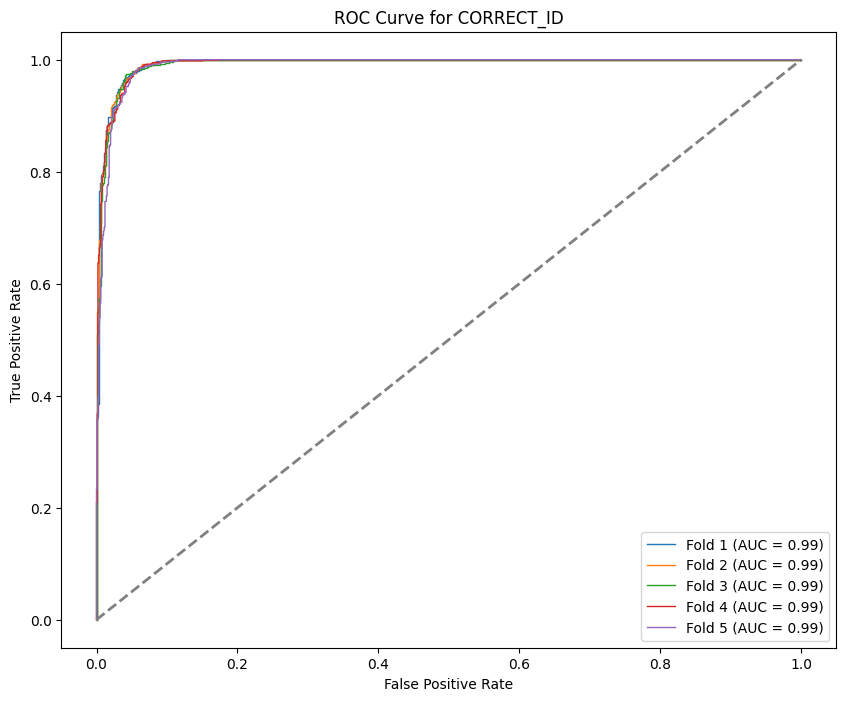


Cross-validation for WRONG_ID:
Fold 1: Accuracy = 97.75%, Log Loss = 0.1670, Training Time = 6.43 seconds
Fold 2: Accuracy = 97.40%, Log Loss = 0.1703, Training Time = 7.80 seconds
Fold 3: Accuracy = 97.40%, Log Loss = 0.1733, Training Time = 6.17 seconds
Fold 4: Accuracy = 97.35%, Log Loss = 0.1727, Training Time = 5.98 seconds
Fold 5: Accuracy = 96.95%, Log Loss = 0.1804, Training Time = 6.05 seconds

Average accuracy for scenario WRONG_ID: 97.37%
Average Log Loss for scenario WRONG_ID: 0.1727
Average training time for scenario WRONG_ID: 6.49 seconds


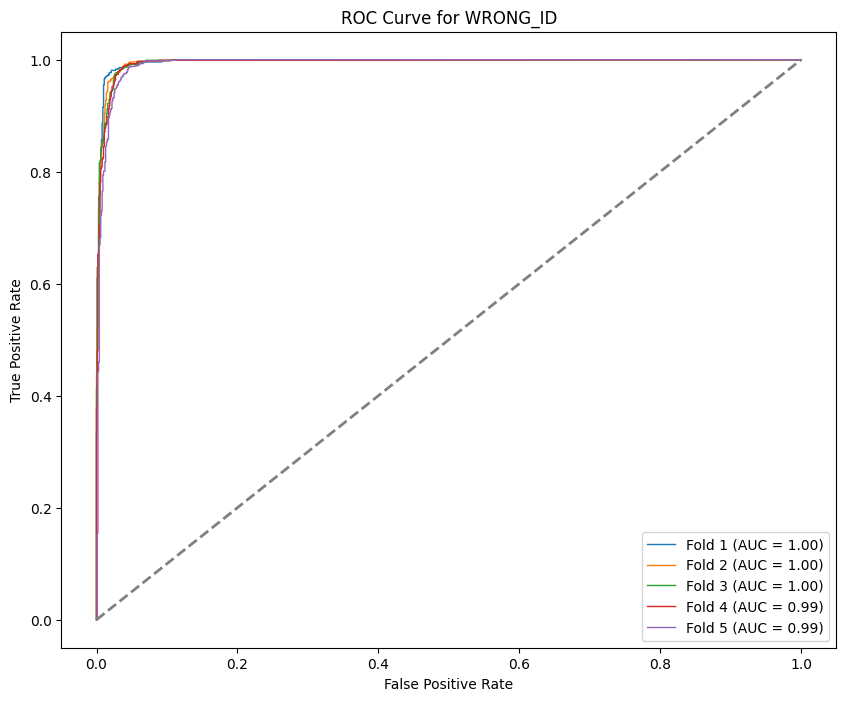

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")


def train_and_evaluate_model(X, y, model, scenario_name, k=5):
    # Initialize Stratified KFold
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_log_losses = []
    training_times = []
    fpr_all = []
    tpr_all = []
    roc_auc_all = []

    print(f"\nCross-validation for {scenario_name}:")

    for fold, (train_index, test_index) in enumerate(cv.split(X, y), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train the model
        start_training_time = time.time()
        model.fit(X_train_scaled, y_train)
        end_training_time = time.time()

        # Training time
        training_time = end_training_time - start_training_time
        training_times.append(training_time)

        # Accuracy and log loss
        y_pred_prob = model.predict_proba(X_test_scaled)
        accuracy = model.score(X_test_scaled, y_test)
        log_loss_value = log_loss(y_test, y_pred_prob)
        fold_accuracies.append(accuracy)
        fold_log_losses.append(log_loss_value)

        # ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        roc_auc_all.append(roc_auc)

        print(f"Fold {fold}: Accuracy = {accuracy * 100:.2f}%, Log Loss = {log_loss_value:.4f}, "
              f"Training Time = {training_time:.2f} seconds")

    # Average results across all folds
    mean_accuracy = np.mean(fold_accuracies)
    mean_log_loss = np.mean(fold_log_losses)
    mean_training_time = np.mean(training_times)

    print(f"\nAverage accuracy for scenario {scenario_name}: {mean_accuracy * 100:.2f}%")
    print(f"Average Log Loss for scenario {scenario_name}: {mean_log_loss:.4f}")
    print(f"Average training time for scenario {scenario_name}: {mean_training_time:.2f} seconds")

    # Plot ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(k):
        plt.plot(fpr_all[i], tpr_all[i], lw=1, label=f'Fold {i+1} (AUC = {roc_auc_all[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {scenario_name}')
    plt.legend(loc="lower right")
    plt.show()


# Model initialization for each scenario
model_CORRECT_ID_VGB = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.85,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model_WRONG_ID_VGB = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.85,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

# Cross-validation for each scenario
train_and_evaluate_model(X_CORRECT_ID_VGB.values, y_CORRECT_ID_VGB.values, model_CORRECT_ID_VGB, "CORRECT_ID")
train_and_evaluate_model(X_WRONG_ID_VGB.values, y_WRONG_ID_VGB.values, model_WRONG_ID_VGB, "WRONG_ID")

# **RANDOM FOREST**

**This code trains and evaluates a Random Forest model for two different scenarios: CORRECT_ID and WRONG_ID. It splits the dataset into training and testing sets, scales the features using StandardScaler, and then trains a Random Forest model with specified hyperparameters for each scenario. The model's performance is evaluated by measuring the training time, prediction time, accuracy, and generating a classification report and confusion matrix.**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Prepare data for CORRECT_ID and WRONG_ID scenarios
X_correct_id_random = CORRECT_ID.drop(columns=['label'])
y_correct_id_random = CORRECT_ID['label']

X_wrong_id_random = WRONG_ID.drop(columns=['label'])
y_wrong_id_random = WRONG_ID['label']

# Define hyperparameters for each scenario
params_correct_id = {'n_estimators': 250, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}
params_wrong_id = {'n_estimators': 150, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4}

# Global model variables for potential reuse
model_correct_id_random = None
model_wrong_id_random = None

def train_and_evaluate_and_store(X, y, params, scenario_name, model_variable_name):
    global model_correct_id_random, model_wrong_id_random

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train Random Forest model
    model = RandomForestClassifier(**params, random_state=42)
    start_training_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_training_time = time.time()
    training_time = end_training_time - start_training_time

    if model_variable_name == "model_correct_id_random":
        model_correct_id_random = model
    elif model_variable_name == "model_wrong_id_random":
        model_wrong_id_random = model

    start_prediction_time = time.time()
    y_pred = model.predict(X_test_scaled)
    end_prediction_time = time.time()
    prediction_time = end_prediction_time - start_prediction_time

    print(f"\n### Scenario: {scenario_name} ###")
    print(f"Parameters: {params}")
    print(f"\nTraining time: {training_time:.2f} seconds")
    print(f"Prediction time: {prediction_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {test_accuracy * 100:.2f}%")

train_and_evaluate_and_store(X_correct_id_random, y_correct_id_random, params_correct_id, "CORRECT_ID", "model_correct_id_random")
train_and_evaluate_and_store(X_wrong_id_random, y_wrong_id_random, params_wrong_id, "WRONG_ID", "model_wrong_id_random")


### Scenario: CORRECT_ID ###
Parameters: {'n_estimators': 250, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}

Training time: 3.48 seconds
Prediction time: 0.04 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       992
           1       0.94      0.99      0.97      1008

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
[[ 930   62]
 [   7 1001]]
Accuracy: 96.55%

### Scenario: WRONG_ID ###
Parameters: {'n_estimators': 150, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4}

Training time: 1.27 seconds
Prediction time: 0.02 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1013
           1       0.96      0.99      0.97       987

    accuracy               

# **RANDOM FOREST - CROSS VALIDATION**

This script performs 5-fold cross-validation for two different scenarios (CORRECT_ID and WRONG_ID) using a Random Forest Classifier. It includes the following steps:
- Scaling the features.
- Training and timing the classifier.
- Computing accuracy, log loss, and ROC curves.
- Plotting ROC curves for each fold and each scenario.


Cross-validation for CORRECT_ID:
Fold 1: Accuracy = 95.60%, Log Loss = 0.1274, Training time = 2.11 seconds
Fold 2: Accuracy = 95.85%, Log Loss = 0.1309, Training time = 2.87 seconds
Fold 3: Accuracy = 95.10%, Log Loss = 0.1354, Training time = 2.07 seconds
Fold 4: Accuracy = 95.90%, Log Loss = 0.1314, Training time = 2.12 seconds
Fold 5: Accuracy = 95.20%, Log Loss = 0.1376, Training time = 2.11 seconds

Average accuracy for CORRECT_ID: 95.53%
Average Log Loss for CORRECT_ID: 0.1326
Average training time for CORRECT_ID: 2.26 seconds


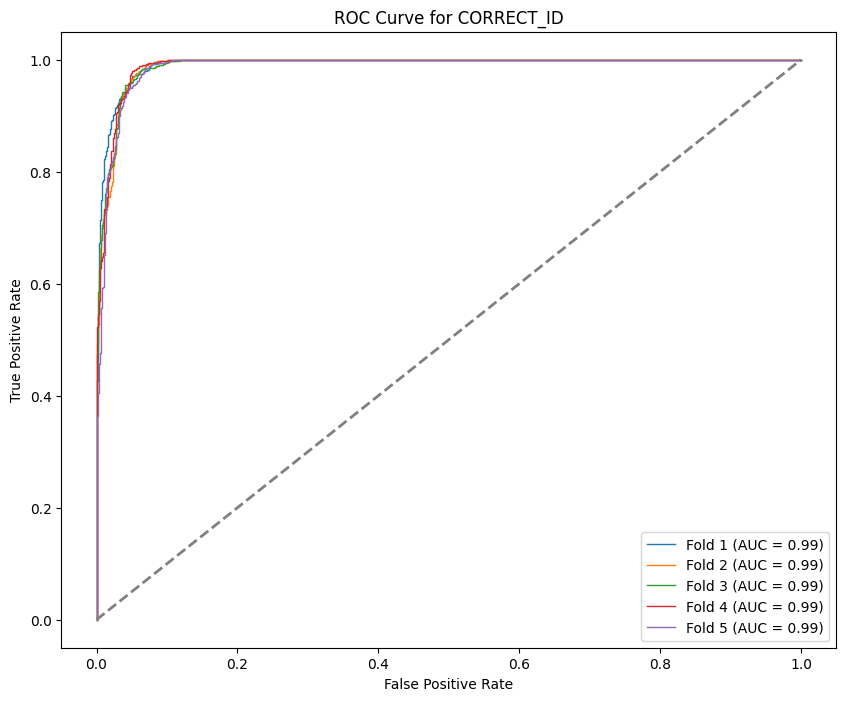


Cross-validation for WRONG_ID:
Fold 1: Accuracy = 97.55%, Log Loss = 0.0841, Training time = 1.28 seconds
Fold 2: Accuracy = 97.05%, Log Loss = 0.0951, Training time = 1.29 seconds
Fold 3: Accuracy = 97.20%, Log Loss = 0.0950, Training time = 1.64 seconds
Fold 4: Accuracy = 97.25%, Log Loss = 0.0935, Training time = 1.64 seconds
Fold 5: Accuracy = 97.00%, Log Loss = 0.1010, Training time = 1.30 seconds

Average accuracy for WRONG_ID: 97.21%
Average Log Loss for WRONG_ID: 0.0937
Average training time for WRONG_ID: 1.43 seconds


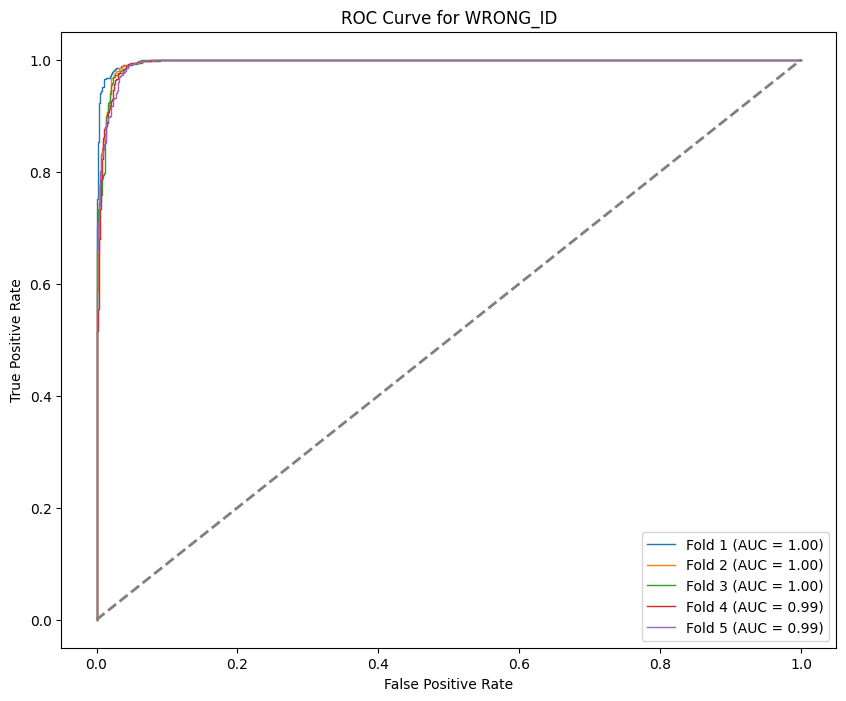

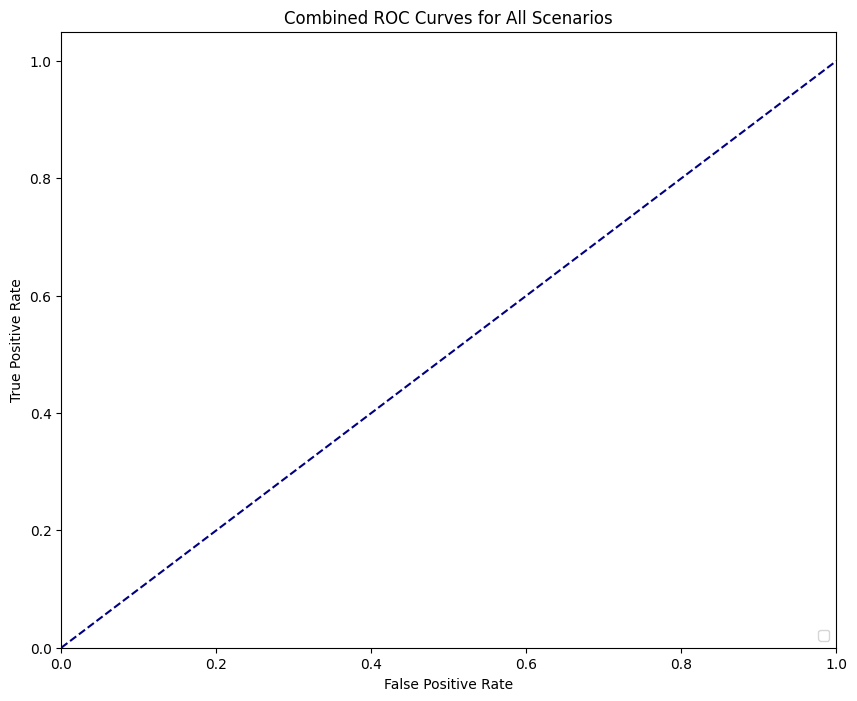

In [19]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Prepare the datasets
X_correct_id_random = CORRECT_ID.drop(columns=['label'])
y_correct_id_random = CORRECT_ID['label']

X_wrong_id_random = WRONG_ID.drop(columns=['label'])
y_wrong_id_random = WRONG_ID['label']

# Define hyperparameters
params_correct_id = {'n_estimators': 250, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 5}
params_wrong_id = {'n_estimators': 150, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4}

# Cross-validation and ROC plotting function
def cross_val_and_roc(X, y, params, scenario_name, all_fpr, all_tpr, all_roc_auc):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = RandomForestClassifier(**params, random_state=42)

    fold_accuracies = []
    fold_log_losses = []
    training_times = []
    fpr_all, tpr_all, roc_auc_all = [], [], []

    for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        start_training_time = time.time()
        model.fit(X_train, y_train)
        end_training_time = time.time()
        training_time = end_training_time - start_training_time

        start_prediction_time = time.time()
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        end_prediction_time = time.time()
        prediction_time = end_prediction_time - start_prediction_time

        accuracy = np.mean(y_pred == y_test)
        log_loss_value = log_loss(y_test, y_proba)

        fold_accuracies.append(accuracy)
        fold_log_losses.append(log_loss_value)
        training_times.append(training_time)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        fpr_all.append(fpr)
        tpr_all.append(tpr)
        roc_auc_all.append(roc_auc)

        print(f"Fold {fold + 1}: Accuracy = {accuracy * 100:.2f}%, Log Loss = {log_loss_value:.4f}, "
              f"Training time = {training_time:.2f} seconds")

    mean_accuracy = np.mean(fold_accuracies)
    mean_log_loss = np.mean(fold_log_losses)
    mean_training_time = np.mean(training_times)

    print(f"\nAverage accuracy for {scenario_name}: {mean_accuracy * 100:.2f}%")
    print(f"Average Log Loss for {scenario_name}: {mean_log_loss:.4f}")
    print(f"Average training time for {scenario_name}: {mean_training_time:.2f} seconds")

    plt.figure(figsize=(10, 8))
    for i in range(5):
        plt.plot(fpr_all[i], tpr_all[i], lw=1, label=f'Fold {i + 1} (AUC = {roc_auc_all[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {scenario_name}')
    plt.legend(loc="lower right")
    plt.show()

# Collecting all ROC data for combined plot
all_fpr = []
all_tpr = []
all_roc_auc = []

print("\nCross-validation for CORRECT_ID:")
cross_val_and_roc(X_correct_id_random, y_correct_id_random, params_correct_id, "CORRECT_ID", all_fpr, all_tpr, all_roc_auc)

print("\nCross-validation for WRONG_ID:")
cross_val_and_roc(X_wrong_id_random, y_wrong_id_random, params_wrong_id, "WRONG_ID", all_fpr, all_tpr, all_roc_auc)

# Combined ROC plot for both scenarios
plt.figure(figsize=(10, 8))
for i in range(0, len(all_fpr), 5):
    scenario = ["CORRECT_ID", "WRONG_ID"][i // 5]
    plt.plot(all_fpr[i], all_tpr[i], label=f'Scenario {scenario} (AUC = {all_roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for All Scenarios')
plt.legend(loc="lower right")
plt.show()

# **MLP**

This script trains and evaluates a Multi-Layer Perceptron (MLP) classifier on two datasets (CORRECT_ID, WRONG_ID). It:
- Splits data into training and testing sets
- Scales features
- Trains an MLP model with specified parameters
- Evaluates prediction performance using accuracy, classification report, and confusion matrix
- Records training and prediction time


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Model storage variables
correct_id_mlp = None
wrong_id_mlp = None

# Training and evaluation function for MLP
def train_and_evaluate_mlp(X, y, params, scenario_name, model_variable_name):
    global correct_id_mlp, wrong_id_mlp

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize MLP model
    model = MLPClassifier(**params, random_state=42)

    # Training
    start_training_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_training_time = time.time()
    training_time = end_training_time - start_training_time

    # Store model
    if model_variable_name == "correct_id_mlp":
        correct_id_mlp = model
    elif model_variable_name == "wrong_id_mlp":
        wrong_id_mlp = model

    # Prediction
    start_prediction_time = time.time()
    y_pred = model.predict(X_test_scaled)
    end_prediction_time = time.time()
    prediction_time = end_prediction_time - start_prediction_time
    test_accuracy = accuracy_score(y_test, y_pred)

    # Evaluation results
    print(f"\n### Scenario: {scenario_name} ###")
    print(f"Parameters: {params}")
    print(f"\nTraining time: {training_time:.2f} seconds")
    print(f"Prediction time: {prediction_time:.2f} seconds")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {test_accuracy * 100:.2f}%")

# MLP parameters
params_mlp = {
    'hidden_layer_sizes': (150, 50),
    'activation': 'tanh',
    'solver': 'adam',
    'max_iter': 300
}

# Prepare datasets
X_correct = CORRECT_ID.drop(columns=['label'])
y_correct = CORRECT_ID['label']

X_wrong_id = WRONG_ID.drop(columns=['label'])
y_wrong_id = WRONG_ID['label']

train_and_evaluate_mlp(X_correct, y_correct, params_mlp, "CORRECT_ID", "correct_id_mlp")
train_and_evaluate_mlp(X_wrong_id, y_wrong_id, params_mlp, "WRONG_ID", "wrong_id_mlp")


### Scenario: CORRECT_ID ###
Parameters: {'hidden_layer_sizes': (150, 50), 'activation': 'tanh', 'solver': 'adam', 'max_iter': 300}

Training time: 59.19 seconds
Prediction time: 0.03 seconds

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       992
           1       0.95      0.98      0.97      1008

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion matrix:
[[944  48]
 [ 19 989]]
Accuracy: 96.65%

### Scenario: WRONG_ID ###
Parameters: {'hidden_layer_sizes': (150, 50), 'activation': 'tanh', 'solver': 'adam', 'max_iter': 300}

Training time: 44.39 seconds
Prediction time: 0.04 seconds

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1013
           1       0.96      0.99      0.97       987

    accuracy      

# **MLP - CROSS VALIDATION**


Cross-validation for scenario: CORRECT_ID
Fold 1: Accuracy = 96.70%, Log Loss = 0.1083, Training Time = 59.55s
Fold 2: Accuracy = 96.60%, Log Loss = 0.0935, Training Time = 61.42s
Fold 3: Accuracy = 97.05%, Log Loss = 0.0854, Training Time = 59.03s
Fold 4: Accuracy = 96.30%, Log Loss = 0.1010, Training Time = 61.58s
Fold 5: Accuracy = 96.35%, Log Loss = 0.1035, Training Time = 27.91s

Average Accuracy for CORRECT_ID: 96.60%
Average Log Loss: 0.0983
Average Training Time: 53.90s
Average Prediction Time: 0.06s


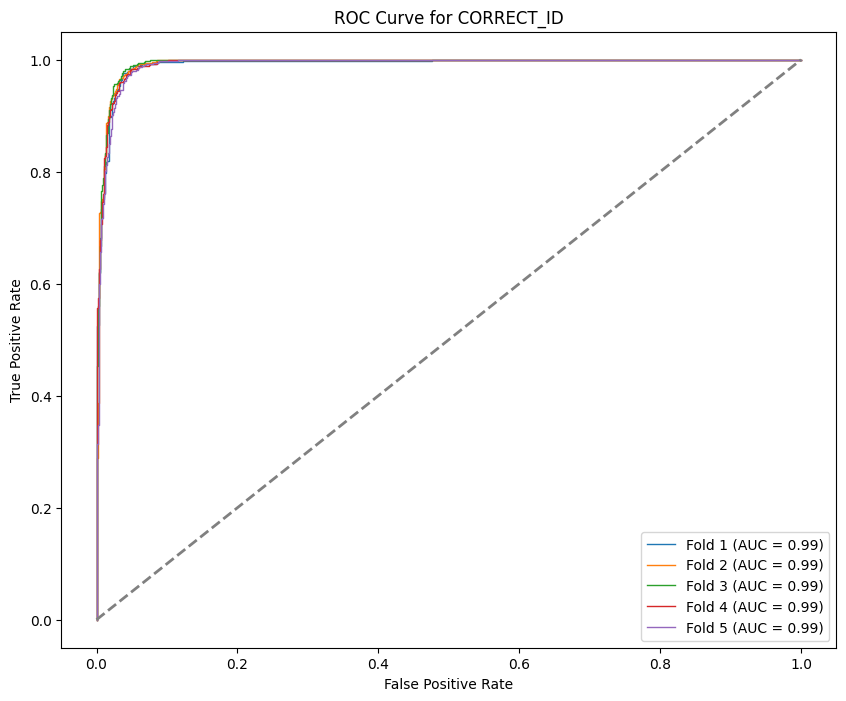


Cross-validation for scenario: WRONG_ID
Fold 1: Accuracy = 97.65%, Log Loss = 0.0722, Training Time = 31.20s
Fold 2: Accuracy = 97.95%, Log Loss = 0.0646, Training Time = 61.81s
Fold 3: Accuracy = 97.80%, Log Loss = 0.0738, Training Time = 56.20s
Fold 4: Accuracy = 97.75%, Log Loss = 0.0683, Training Time = 61.36s
Fold 5: Accuracy = 97.55%, Log Loss = 0.0671, Training Time = 58.89s

Average Accuracy for WRONG_ID: 97.74%
Average Log Loss: 0.0692
Average Training Time: 53.89s
Average Prediction Time: 0.06s


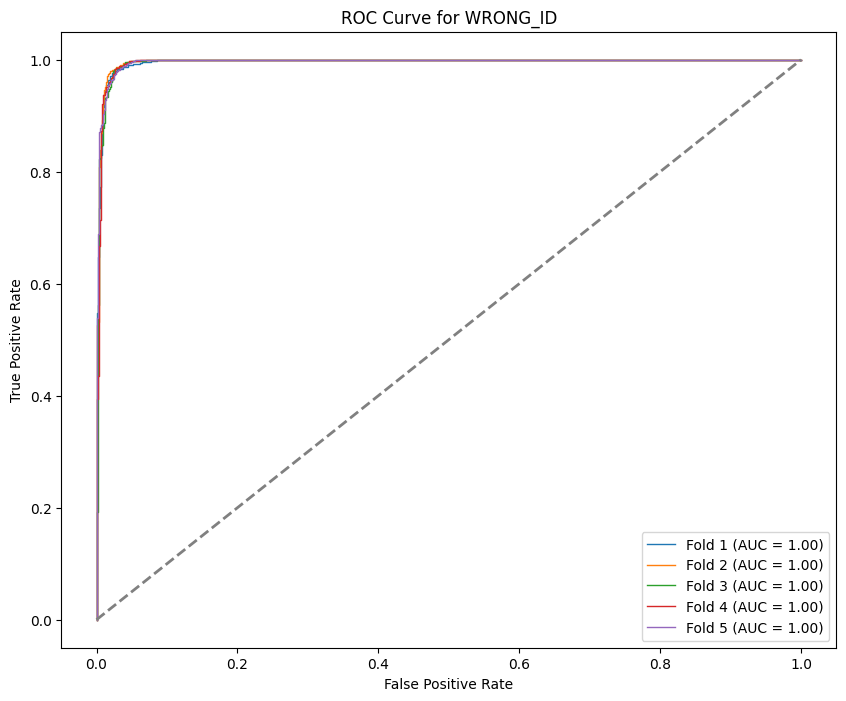

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_curve, auc
import time
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cross-validation for MLP model
def cross_val_mlp(X, y, params, scenario_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    log_losses = []
    training_times = []
    prediction_times = []
    fpr_all, tpr_all, roc_auc_all = [], [], []

    print(f"\nCross-validation for scenario: {scenario_name}")

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = MLPClassifier(**params, random_state=42)

        # Training time
        start_training_time = time.time()
        model.fit(X_train_scaled, y_train)
        end_training_time = time.time()
        training_time = end_training_time - start_training_time
        training_times.append(training_time)

        # Prediction time
        start_prediction_time = time.time()
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        end_prediction_time = time.time()
        prediction_time = end_prediction_time - start_prediction_time
        prediction_times.append(prediction_time)

        # Metrics
        accuracy = np.mean(y_pred == y_test) * 100
        log_loss_value = log_loss(y_test, y_proba)

        accuracies.append(accuracy)
        log_losses.append(log_loss_value)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        fpr_all.append(fpr)
        tpr_all.append(tpr)
        roc_auc_all.append(roc_auc)

        print(f"Fold {fold}: Accuracy = {accuracy:.2f}%, Log Loss = {log_loss_value:.4f}, "
              f"Training Time = {training_time:.2f}s")

    # Averages
    print(f"\nAverage Accuracy for {scenario_name}: {np.mean(accuracies):.2f}%")
    print(f"Average Log Loss: {np.mean(log_losses):.4f}")
    print(f"Average Training Time: {np.mean(training_times):.2f}s")
    print(f"Average Prediction Time: {np.mean(prediction_times):.2f}s")

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(5):
        plt.plot(fpr_all[i], tpr_all[i], lw=1, label=f'Fold {i+1} (AUC = {roc_auc_all[i]:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {scenario_name}')
    plt.legend(loc="lower right")
    plt.show()

# MLP parameters
params_mlp = {
    'hidden_layer_sizes': (150, 50),
    'activation': 'tanh',
    'solver': 'adam',
    'max_iter': 300
}

# Prepare datasets
X_correct = CORRECT_ID.drop(columns=['label']).values
y_correct = CORRECT_ID['label'].values

X_wrong_id = WRONG_ID.drop(columns=['label']).values
y_wrong_id = WRONG_ID['label'].values

# Run cross-validation
cross_val_mlp(X_correct, y_correct, params_mlp, "CORRECT_ID")
cross_val_mlp(X_wrong_id, y_wrong_id, params_mlp, "WRONG_ID")

# **LOGISTIC REGRESSION**

**This code trains and evaluates a Logistic Regression model for two different scenarios: CORRECT_ID and WRONG_ID. It first splits the dataset into training and testing sets, scales the features using StandardScaler, and then trains a Logistic Regression model with specified hyperparameters. The model is evaluated by measuring its training time, prediction time, accuracy, and generating a classification report and confusion matrix for both scenarios.**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Global model holders
correct_id_lr = None
wrong_id_lr = None

def train_and_evaluate_lr(X, y, params, scenario_name, model_variable_name):
    global correct_id_lr, wrong_id_lr

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(**params, random_state=42)

    # Measure training time
    start_training_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_training_time = time.time()
    training_time = end_training_time - start_training_time

    # Save model to appropriate global variable
    if model_variable_name == "correct_id_lr":
        correct_id_lr = model
    elif model_variable_name == "wrong_id_lr":
        wrong_id_lr = model

    # Measure prediction time
    start_prediction_time = time.time()
    y_pred = model.predict(X_test_scaled)
    end_prediction_time = time.time()
    prediction_time = end_prediction_time - start_prediction_time

    # Evaluation report
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\n### Scenario: {scenario_name} ###")
    print(f"Training time: {training_time:.2f} seconds")
    print(f"Prediction time: {prediction_time:.2f} seconds")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {test_accuracy * 100:.2f}%")

# Logistic Regression parameters
params_lr = {
    'max_iter': 300,
    'C': 1.0,
    'solver': 'lbfgs',
    'penalty': 'l2',
    'multi_class': 'ovr',
    'class_weight': 'balanced'
}

# Prepare datasets
X_correct = CORRECT_ID.drop(columns=['label'])
y_correct = CORRECT_ID['label']

X_wrong_id = WRONG_ID.drop(columns=['label'])
y_wrong_id = WRONG_ID['label']

# Train and evaluate
train_and_evaluate_lr(X_correct, y_correct, params_lr, "CORRECT_ID", "correct_id_lr")
train_and_evaluate_lr(X_wrong_id, y_wrong_id, params_lr, "WRONG_ID", "wrong_id_lr")


### Scenario: CORRECT_ID ###
Training time: 0.03 seconds
Prediction time: 0.00 seconds

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       992
           1       0.94      0.95      0.95      1008

    accuracy                           0.94      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.94      0.94      2000


Confusion matrix:
[[933  59]
 [ 51 957]]
Accuracy: 94.50%

### Scenario: WRONG_ID ###
Training time: 0.02 seconds
Prediction time: 0.00 seconds

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1013
           1       0.94      0.96      0.95       987

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Confusion matrix:
[[951  62]
 [ 39 948]]
Accuracy: 94.95%


# **CROSS VALIDATION - LOGISTIC REGRESSION**

In [23]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Prepare datasets
X_correct = CORRECT_ID.drop(columns=['label'])
y_correct = CORRECT_ID['label']

X_wrong_id = WRONG_ID.drop(columns=['label'])
y_wrong_id = WRONG_ID['label']

# Logistic Regression parameters
params_lr = {
    'max_iter': 300,
    'C': 1.0,
    'solver': 'lbfgs',
    'penalty': 'l2',
    'multi_class': 'ovr',
    'class_weight': 'balanced'
}

# Cross-validation and evaluation function
def cross_val_and_evaluate_lr(X, y, params, scenario_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = LogisticRegression(**params, random_state=42)

    fold_accuracies = []
    fold_log_losses = []
    training_times = []
    prediction_times = []

    # Cross-validation loop
    for fold, (train_index, test_index) in enumerate(cv.split(X_scaled, y)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Training time measurement
        start_training_time = time.time()
        model.fit(X_train, y_train)
        end_training_time = time.time()
        training_time = end_training_time - start_training_time

        # Prediction time measurement
        start_prediction_time = time.time()
        y_pred = model.predict(X_test)
        end_prediction_time = time.time()
        prediction_time = end_prediction_time - start_prediction_time

        # Accuracy and Log Loss calculations
        accuracy = np.mean(y_pred == y_test)
        log_loss_value = log_loss(y_test, model.predict_proba(X_test)[:, 1])

        fold_accuracies.append(accuracy)
        fold_log_losses.append(log_loss_value)
        training_times.append(training_time)
        prediction_times.append(prediction_time)

        print(f"Fold {fold + 1}: Accuracy = {accuracy * 100:.2f}%, Log Loss = {log_loss_value:.4f}, "
              f"Training Time = {training_time:.2f} seconds")

    # Calculating averages
    mean_accuracy = np.mean(fold_accuracies)
    mean_log_loss = np.mean(fold_log_losses)
    mean_training_time = np.mean(training_times)
    mean_prediction_time = np.mean(prediction_times)

    print(f"\nAverage Accuracy for {scenario_name}: {mean_accuracy * 100:.2f}%")
    print(f"Average Log Loss for {scenario_name}: {mean_log_loss:.4f}")
    print(f"Average Training Time for {scenario_name}: {mean_training_time:.2f} seconds")
    print(f"Average Prediction Time for {scenario_name}: {mean_prediction_time:.2f} seconds")

# Run cross-validation for CORRECT_ID and WRONG_ID
print("\nCross-validation for CORRECT_ID:")
cross_val_and_evaluate_lr(X_correct, y_correct, params_lr, "CORRECT_ID")

print("\nCross-validation for WRONG_ID:")
cross_val_and_evaluate_lr(X_wrong_id, y_wrong_id, params_lr, "WRONG_ID")


Cross-validation for CORRECT_ID:
Fold 1: Accuracy = 93.60%, Log Loss = 0.1958, Training Time = 0.03 seconds
Fold 2: Accuracy = 93.25%, Log Loss = 0.2008, Training Time = 0.02 seconds
Fold 3: Accuracy = 93.75%, Log Loss = 0.1877, Training Time = 0.02 seconds
Fold 4: Accuracy = 93.55%, Log Loss = 0.1827, Training Time = 0.03 seconds
Fold 5: Accuracy = 93.35%, Log Loss = 0.2111, Training Time = 0.02 seconds

Average Accuracy for CORRECT_ID: 93.50%
Average Log Loss for CORRECT_ID: 0.1956
Average Training Time for CORRECT_ID: 0.03 seconds
Average Prediction Time for CORRECT_ID: 0.00 seconds

Cross-validation for WRONG_ID:
Fold 1: Accuracy = 95.50%, Log Loss = 0.1315, Training Time = 0.03 seconds
Fold 2: Accuracy = 95.00%, Log Loss = 0.1520, Training Time = 0.02 seconds
Fold 3: Accuracy = 94.25%, Log Loss = 0.1661, Training Time = 0.02 seconds
Fold 4: Accuracy = 95.50%, Log Loss = 0.1605, Training Time = 0.02 seconds
Fold 5: Accuracy = 95.05%, Log Loss = 0.1485, Training Time = 0.02 seconds

# **REGRESSION METAMODEL**

**This code performs cross-validation and evaluation of a meta-model, which aggregates predictions from multiple base models. First, it conducts cross-validation on the meta-model and plots accuracy scores per fold, with an average accuracy line for reference. After training the meta-model, predictions are made on the test set, and various performance metrics, including accuracy, F1-score, precision, and recall, are displayed. The confusion matrix is visualized to highlight the model's performance on both classes. Additionally, the code calculates false positives, false negatives, and the prediction time. Finally, it presents a bar plot of the model's metrics and provides detailed insights into its classification performance.**

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

### Cross-Validation for Meta-Model ###
Average Cross-Validation Accuracy: 0.97 ± 0.00
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Meta-Model Results ###
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2000
           1       0.96      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Confusion Matrix:
[[1919   81]
 [  18 1982]]
Meta-Model Accuracy on Test Set: 0.9752
Meta-Model F1-Score: 0.9756
Meta-Model Precision: 0.9607
Meta-Model Recall: 0.9910
False Positives on Test Set: 81
False Negatives on Test Set: 18

Meta-Model Prediction Time on Test Set: 2.4907 seconds


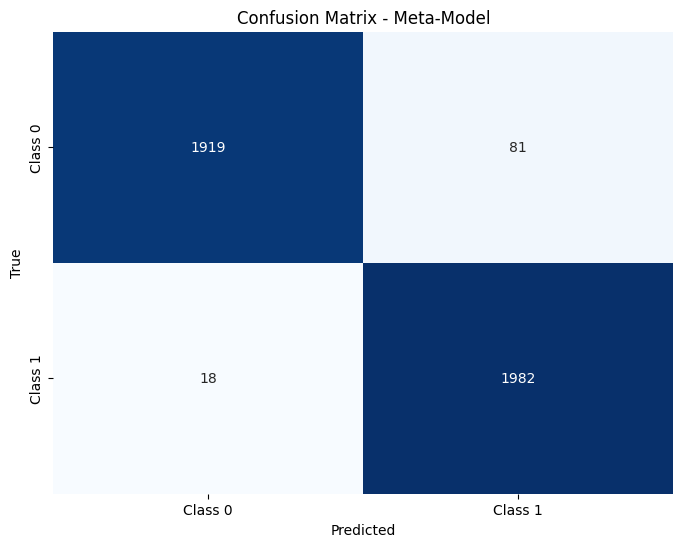

In [26]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models that will be used as base models
models = {
    "correct_id_nn": net_correct_id,
    "wrong_id_nn": net_wrong_id,
    "correct_id_vgb": model_CORRECT_ID_VGB,
    "wrong_id_vgb": model_WRONG_ID_VGB,
    "correct_id_mlp": correct_id_mlp,
    "wrong_id_mlp": wrong_id_mlp,
    "correct_id_random": model_correct_id_random,
    "wrong_id_random": model_wrong_id_random,
    "correct_id_lr": correct_id_lr,
    "wrong_id_lr": wrong_id_lr,
}

# Preparing the datasets
X_correct = CORRECT_ID.drop(columns=['label'])
y_correct = CORRECT_ID['label']

X_wrong_id = WRONG_ID.drop(columns=['label'])
y_wrong_id = WRONG_ID['label']

# Combine data into one dataset
X_all = np.vstack([X_correct, X_wrong_id])
y_all = np.hstack([y_correct, y_wrong_id])

# Scaling the features
scaler = RobustScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all)

# Function to get predictions from all base models
def get_predictions(models, X):
    predictions = []
    for model_name, model in models.items():
        try:
            # Predict probabilities if possible, else use direct predictions
            pred = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else model.predict(X)
            predictions.append(pred)
        except Exception as e:
            print(f"Error with model {model_name}: {e}")
    return np.column_stack(predictions) if predictions else np.empty((X.shape[0], 0))

# Generate meta-features for the training data
X_train_meta = get_predictions(models, X_train)

if X_train_meta.shape[1] == 0:
    raise ValueError("No predictions from base models.")

# Building the meta-model (regressor)
meta_model = LogisticRegression(random_state=42)  # You can replace it with any other regressor if necessary

# Measure training time for the meta-model
start_time = time.time()

# Cross-validation for meta-model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(meta_model, X_train_meta, y_train, cv=cv, scoring='accuracy')

print(f"\n### Cross-Validation for Meta-Model ###")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Train the meta-model on the entire training set
meta_model.fit(X_train_meta, y_train)

# Predictions for the test set using the meta-model
X_test_meta = get_predictions(models, X_test)

if X_test_meta.shape[1] == 0:
    raise ValueError("No predictions from base models on the test set.")

# Meta-model predictions
y_test_pred = meta_model.predict(X_test_meta)

print("\n### Meta-Model Results ###")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{cm}")

# Evaluation Metrics
accuracy = np.mean(y_test_pred == y_test)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Meta-Model Accuracy on Test Set: {accuracy:.4f}")
print(f"Meta-Model F1-Score: {f1:.4f}")
print(f"Meta-Model Precision: {precision:.4f}")
print(f"Meta-Model Recall: {recall:.4f}")

# False positives and false negatives
false_positives_test = np.sum((y_test_pred == 1) & (y_test == 0))
false_negatives_test = np.sum((y_test_pred == 0) & (y_test == 1))

print(f"False Positives on Test Set: {false_positives_test}")
print(f"False Negatives on Test Set: {false_negatives_test}")

# Training and prediction time
prediction_time = time.time() - start_time
print(f"\nMeta-Model Prediction Time on Test Set: {prediction_time:.4f} seconds")

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Meta-Model")
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Meta-model Results on Test Set ###
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2000
           1       0.96      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



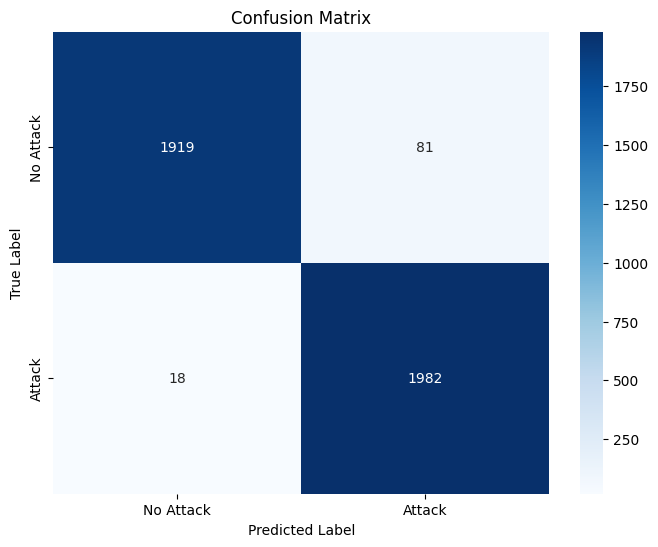

Meta-model accuracy on test set: 0.9752
Meta-model F1-Score: 0.9756
Meta-model Precision: 0.9607
Meta-model Recall: 0.9910
False positives on test set: 81
False negatives on test set: 18

### Cross-validation on Test Set ###
Average cross-validation accuracy: 0.98 ± 0.00


In [27]:
X_test_meta = get_predictions(models, X_test)

# Check if we received predictions from base models
if X_test_meta.shape[1] == 0:
    raise ValueError("No predictions from base models on the test set. Please check the data.")

# Get predictions from the meta-model
y_test_pred = meta_model.predict(X_test_meta)

print("\n### Meta-model Results on Test Set ###")
print(classification_report(y_test, y_test_pred))

# Confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate additional metrics
accuracy_test = np.mean(y_test_pred == y_test)
f1_test = f1_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Display results
print(f"Meta-model accuracy on test set: {accuracy_test:.4f}")
print(f"Meta-model F1-Score: {f1_test:.4f}")
print(f"Meta-model Precision: {precision_test:.4f}")
print(f"Meta-model Recall: {recall_test:.4f}")

# False positives and false negatives
false_positives_test = np.sum((y_test_pred == 1) & (y_test == 0))
false_negatives_test = np.sum((y_test_pred == 0) & (y_test == 1))

print(f"False positives on test set: {false_positives_test}")
print(f"False negatives on test set: {false_negatives_test}")

# Cross-validation on the test set
cv_scores_test = cross_val_score(meta_model, X_test_meta, y_test, cv=cv, scoring='accuracy')

# Cross-validation results
print("\n### Cross-validation on Test Set ###")
print(f"Average cross-validation accuracy: {cv_scores_test.mean():.2f} ± {cv_scores_test.std():.2f}")


### Cross-Validation of Meta-Model ###
Average cross-validation accuracy: 0.97 ± 0.00


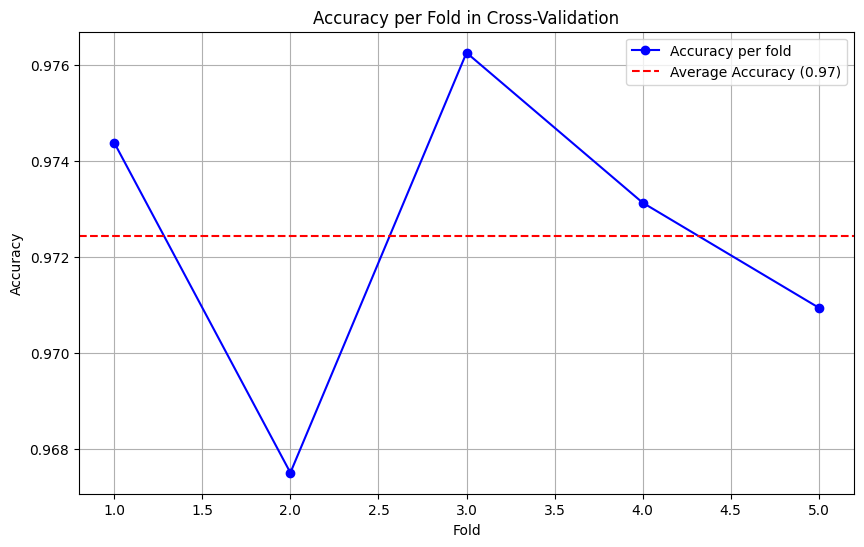

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

### Meta-Model Results on Test Set ###
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2000
           1       0.96      0.99      0.98      2000

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



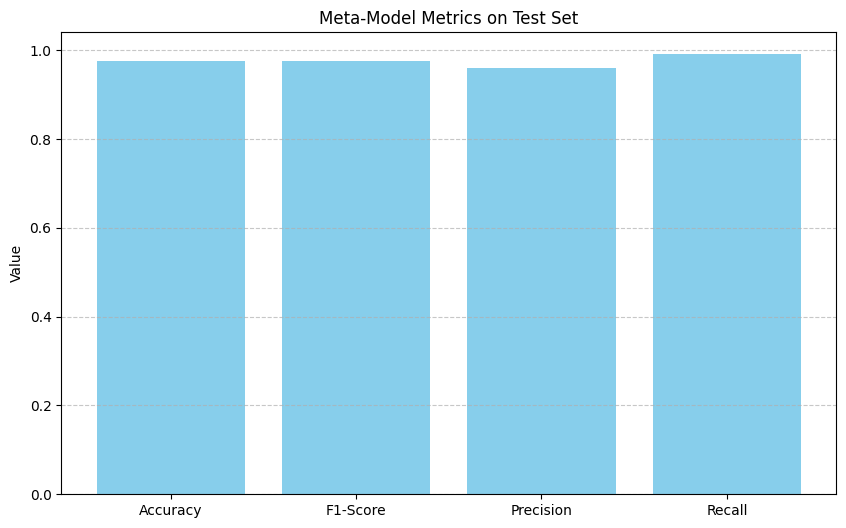

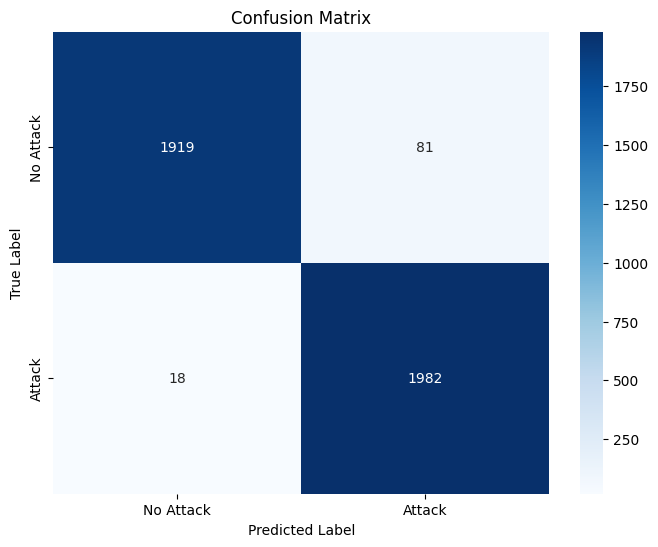

Meta-model accuracy on test set: 0.9752
Meta-model F1-Score: 0.9756
Meta-model Precision: 0.9607
Meta-model Recall: 0.9910
False positives on the test set: 81
False negatives on the test set: 18

Prediction time for the meta-model on the test set: 48.6095 seconds


In [28]:
print(f"\n### Cross-Validation of Meta-Model ###")
print(f"Average cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Plotting the accuracy for each fold
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='b', label='Accuracy per fold')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Average Accuracy ({cv_scores.mean():.2f})')
plt.title('Accuracy per Fold in Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Train the meta-model
meta_model.fit(X_train_meta, y_train)

# Get the predictions from base models on the test set
X_test_meta = get_predictions(models, X_test)

if X_test_meta.shape[1] == 0:
    raise ValueError("No predictions from base models on the test set. Please check the data.")

# Predict with the meta-model on the test set
y_test_pred = meta_model.predict(X_test_meta)

print("\n### Meta-Model Results on Test Set ###")
print(classification_report(y_test, y_test_pred))

# Plot the performance metrics (Accuracy, F1-Score, Precision, Recall)
plt.figure(figsize=(10, 6))
plt.bar(["Accuracy", "F1-Score", "Precision", "Recall"], [accuracy, f1, precision, recall], color='skyblue')
plt.title("Meta-Model Metrics on Test Set")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Recalculate metrics for the meta-model
accuracy = np.mean(y_test_pred == y_test)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Meta-model accuracy on test set: {accuracy:.4f}")
print(f"Meta-model F1-Score: {f1:.4f}")
print(f"Meta-model Precision: {precision:.4f}")
print(f"Meta-model Recall: {recall:.4f}")

# Calculate false positives and false negatives
false_positives_test = np.sum((y_test_pred == 1) & (y_test == 0))
false_negatives_test = np.sum((y_test_pred == 0) & (y_test == 1))

print(f"False positives on the test set: {false_positives_test}")
print(f"False negatives on the test set: {false_negatives_test}")

# Measure prediction time
prediction_time = time.time() - start_time
print(f"\nPrediction time for the meta-model on the test set: {prediction_time:.4f} seconds")